In [43]:
#importing libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#loading dataset
df = pd.read_excel('9_Groceries.xlsx')  
#Viewing dataset
df.head(10)  

,Unnamed: 0,Cleaned Detailed Review,Trust
0,904,really effective hair fall reduced drastically...,1
1,899,best hairball protection oil really work great,1
2,125,170 almond i,1
3,916,product good offer also goodplease reduceavoid...,1
4,261,awesome blossom damage quality quantity good c...,1
5,902,product good dont know result actionbut flippa...,1
6,900,fast delivery receive good packaging originall...,1
7,914,using product since 2 month yes working reduce...,1
8,0,good quality protein food worth buying u never...,1
9,908,used three bottle didnt get desired result fre...,0


In [45]:
#to  display number of rows and column in our dataset
df.shape  

(783, 3)

In [46]:
#removing null comments  from review column
df = df[df['Cleaned Detailed Review'].notna()]    
df.shape

(779, 3)

In [47]:
# balancing data in such a way that we are having equal zeros and ones
high_review = df[df['Trust']==1]
low_review = df[df['Trust']==0]
df_high_new = high_review.sample(low_review.shape[0])
df= pd.concat([df_high_new, low_review])

In [48]:
df['Trust'].value_counts()

1    253
0    253
Name: Trust, dtype: int64

In [49]:
#Converting Cleaned detailed review column to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Cleaned Detailed Review'])  

In [50]:
#Displaying matrix form of column 
print(text_tf)  

  (0, 406)	0.17531089169846215
  (0, 811)	0.24771865283043773
  (0, 505)	0.24771865283043773
  (0, 301)	0.21347804066334675
  (0, 623)	0.24771865283043773
  (0, 221)	0.24771865283043773
  (0, 203)	0.26410412264346755
  (0, 573)	0.24771865283043773
  (0, 991)	0.26410412264346755
  (0, 845)	0.4394150143419297
  (0, 863)	0.4161636626490436
  (0, 350)	0.26410412264346755
  (0, 132)	0.20332203735793503
  (1, 427)	0.5024042621785674
  (1, 548)	0.3725138434771137
  (1, 616)	0.3725138434771137
  (1, 783)	0.2539862783785504
  (1, 836)	0.3330046551109259
  (1, 252)	0.2539862783785504
  (1, 980)	0.24727267948844134
  (1, 818)	0.3494024498489653
  (1, 713)	0.11324497143397473
  (1, 617)	0.18465209749410522
  (2, 322)	0.7547933370362635
  (2, 128)	0.5877656029372909
  :	:
  (500, 741)	0.23654028829443585
  (500, 828)	0.32680168014647976
  (501, 591)	0.6047835074866399
  (501, 546)	0.6047835074866399
  (501, 532)	0.4420548362741031
  (501, 410)	0.27029861241040504
  (502, 336)	0.6029344913141252
  (

In [51]:
#splitting data into train and test data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Trust'], test_size=0.3, random_state=1,stratify=df['Trust'])

In [52]:


#putting traaining data
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
ml=SVM.fit(X_train, y_train)
y_predicted= ml.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm 

array([[61, 15],
       [15, 61]])

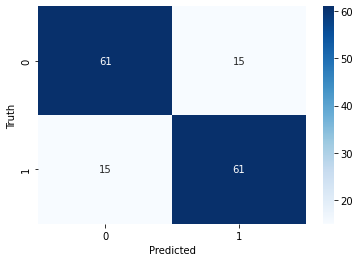

In [54]:
#plotting heatmap
sns.heatmap(cm,annot=True, fmt='1', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [55]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        76
           1       0.80      0.80      0.80        76

    accuracy                           0.80       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.80      0.80      0.80       152

